<a href="https://colab.research.google.com/github/yunjungjoe/MLB-HeightsWeights/blob/main/Baseball_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Regression

Human Height and Weight are mostly hereditable, but lifestyles (e.g., regular strenuous physical exercise), diet, health and environmental factors also play a role in determining individual's physical characteristics. The dataset below contains 1035 records of heights and weights for some current and recent Major League Baseball (MLB) Players. These data were obtained from different resources (e.g., IBM Many Eyes and the references below). See also the 25,000 records of adolescent height and weight.

## Ingest

Source:  http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/functional_intro_to_python/master/data/mlb_weight_ht.csv")
df.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


Find N/A : remove rows and columns with Null/NaN values

In [2]:
df.shape

(1034, 6)

In [3]:
df.isnull().values.any()

True

In [4]:
df = df.dropna()
df.isnull().values.any()

False

In [5]:
df.shape

(1033, 6)

### Clean

In [6]:
df.rename(index=str, 
             columns={"Height(inches)": "Height", "Weight(pounds)": "Weight"},
             inplace=True)
df.head()


,Name,Team,Position,Height,Weight,Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


## EDA (Exploratory Data Analysis)

In [7]:
df.describe()

,Height,Weight,Age
count,1033.000000,1033.000000,1033.000000
mean,73.698935,201.689255,28.737648
std,2.306330,20.991491,4.322298
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.930000
75%,75.000000,215.000000,31.240000
max,83.000000,290.000000,48.520000


What about "Positions"?  What can we infer about a typical player from different positions?

In [8]:
df_positions = df.groupby("Position").median()
df_positions.reset_index(inplace=True)
df_positions

,Position,Height,Weight,Age
0,Catcher,73.0,205.0,30.060
1,Designated_Hitter,74.5,224.5,29.200
2,First_Baseman,74.0,220.0,28.800
3,Outfielder,73.0,200.0,28.140
4,Relief_Pitcher,74.0,200.0,27.560
5,Second_Baseman,72.0,185.0,28.435
6,Shortstop,72.0,180.0,27.800
7,Starting_Pitcher,74.5,205.0,27.390
8,Third_Baseman,73.0,200.0,27.900


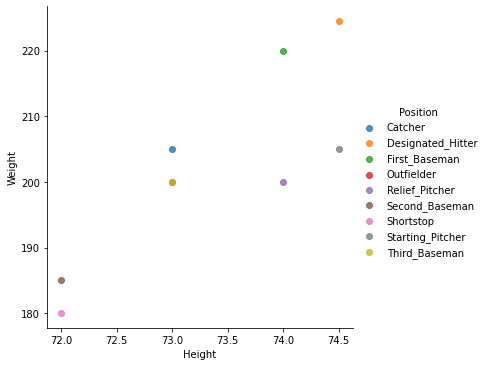

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x="Height", y="Weight",data=df_positions, hue="Position")

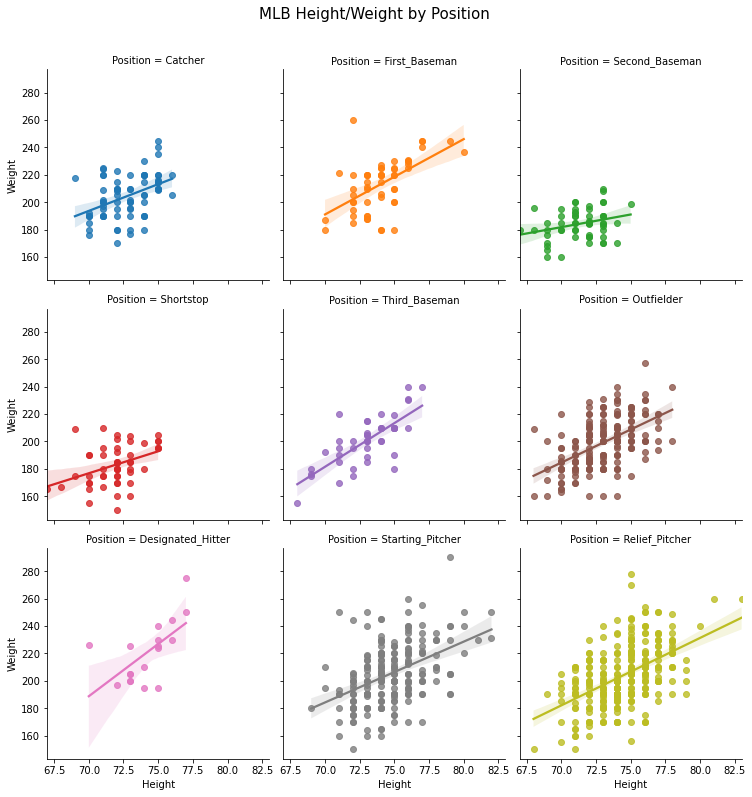

In [11]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col="Position", height=3.5, col_wrap=3, hue="Position")
g.fig.suptitle("MLB Height/Weight by Position", fontsize=15, y=1.05)
g.map(sns.regplot, "Height", "Weight")

## Modeling

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Select Feature

Using Weight to Predict Height, so just one feature


In [13]:
var = df['Height'].values
var.shape

(1033,)

In [14]:
y = df['Height'].values #Target
y = y.reshape(-1, 1)
X = df['Weight'].values #Feature(s)
X = X.reshape(-1,1)

In [15]:
X.shape

(1033, 1)

In [16]:
y.shape

(1033, 1)

### Split Data and Scale Data

Scaling workflow step by step to make it easier to understand

In [17]:
scaler = StandardScaler()

In [18]:
X_scaler = scaler.fit(X)
X


array([[180.],
       [215.],
       [210.],
       ...,
       [205.],
       [190.],
       [195.]])

In [19]:
X = X_scaler.transform(X)
X

array([[-1.0337408 ],
       [ 0.6344091 ],
       [ 0.39610197],
       ...,
       [ 0.15779485],
       [-0.55712654],
       [-0.31881941]])

In [20]:
y_scaler = scaler.fit(y)
y

array([[74],
       [74],
       [72],
       ...,
       [75],
       [75],
       [73]])

In [21]:
y = y_scaler.transform(y)
y

array([[ 0.13060176],
       [ 0.13060176],
       [-0.73699706],
       ...,
       [ 0.56440117],
       [ 0.56440117],
       [-0.30319765]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(929, 1) (929, 1)
(104, 1) (104, 1)


### Fit the model

In [23]:
from sklearn.linear_model import Ridge
clf = Ridge()
model = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [24]:
y_test.shape

(104, 1)

In [26]:
predictions.shape

(104, 1)

unscaled predictions, converted to DataFrame and described

In [27]:
df_predictions = pd.DataFrame(predictions)
df.describe()

,Height,Weight,Age
count,1033.000000,1033.000000,1033.000000
mean,73.698935,201.689255,28.737648
std,2.306330,20.991491,4.322298
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.930000
75%,75.000000,215.000000,31.240000
max,83.000000,290.000000,48.520000


### Plot Predictions

Let's inverse scale back to view predictions in a form we can understand, then plot

In [28]:
df_inverse_scaled_prediction = pd.DataFrame(y_scaler.inverse_transform(y))
df_inverse_scaled_prediction.describe()

,0
count,1033.000000
mean,73.698935
std,2.306330
min,67.000000
25%,72.000000
50%,74.000000
75%,75.000000
max,83.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted Height')

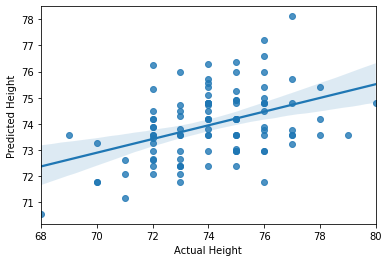

In [29]:
plot = sns.regplot(y_scaler.inverse_transform(y_test), y_scaler.inverse_transform(predictions))
plt.xlabel("Actual Height")
plt.ylabel("Predicted Height")

### Print Accuracy of Linear Regression Model

In [30]:
model.score(X_test, y_test)

0.12617809767043442

### Export Model

In [31]:
import joblib

In [32]:
joblib.dump(model, 'model.joblib')

['model.joblib']

### Verify Model Import Feedbackloop

In [39]:
clf_disk = joblib.load("model.joblib")

### Test Predict From Model Loaded From Disk

View data

In [34]:
df.tail()

,Name,Team,Position,Height,Weight,Age
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01
1033,Josh_Kinney,STL,Relief_Pitcher,73,195.0,27.92


Get one observation and only get the Weight by grabbing Chris_Narveson

In [35]:
pX = df.iloc[[1030]][["Weight"]].values #Feature(s)
pX = pX.reshape(-1,1)
pX

array([[205.]])

Scale Input

In [36]:
target = df["Weight"].values
target = target.reshape(-1, 1)
target

array([[180.],
       [215.],
       [210.],
       ...,
       [205.],
       [190.],
       [195.]])

In [37]:
import numpy as np
input_scaler = StandardScaler().fit(target) #scale relative to the values in the df
scaled_input = input_scaler.transform(pX)
np.array2string(scaled_input, formatter={'float_kind':'{0:.3f}'.format})

'[[0.158]]'

Inverse Transform Predicted Height

In [40]:
result = clf.predict(scaled_input)
print(f"Unscaled prediction {result.tolist()[0]}")
transformed_prediction = y_scaler.inverse_transform(result) #Note the y_scaler is the target scaler
print(f"transformed_prediction {transformed_prediction.tolist()[0]}")

Unscaled prediction [0.08000412386683987]
transformed_prediction [73.88336168042792]
